In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data/data-combined.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

41106 rows and 19 columns are there in our dataset

In [3]:
df.describe()

danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061250      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.397000  1.729278e+05        4.000000     27.599792   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
75%        0.768000    136.494000  2.667730e+05        4.000000     47.625615   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target  
count  41106.000000  41106.000000  
mean      10.475673      0.500000  
std        4.871850      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.500000  
75%       12.000000      1.000000  
max      169.000000      1.000000

From the abobe data we can see that target column has even distribution whereas loudness and liveness have skewed distribution. Most features are in the range of 0 to 1.

In [4]:
#to check if there are any missing values
df.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [6]:
#check for duplicates
sum(df.duplicated())


420

In [7]:
df= df[~df.duplicated()]
df.shape

(40686, 19)

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'duration_ms'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'chorus_hit'}>,
        <AxesSubplot:title={'center':'sections'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

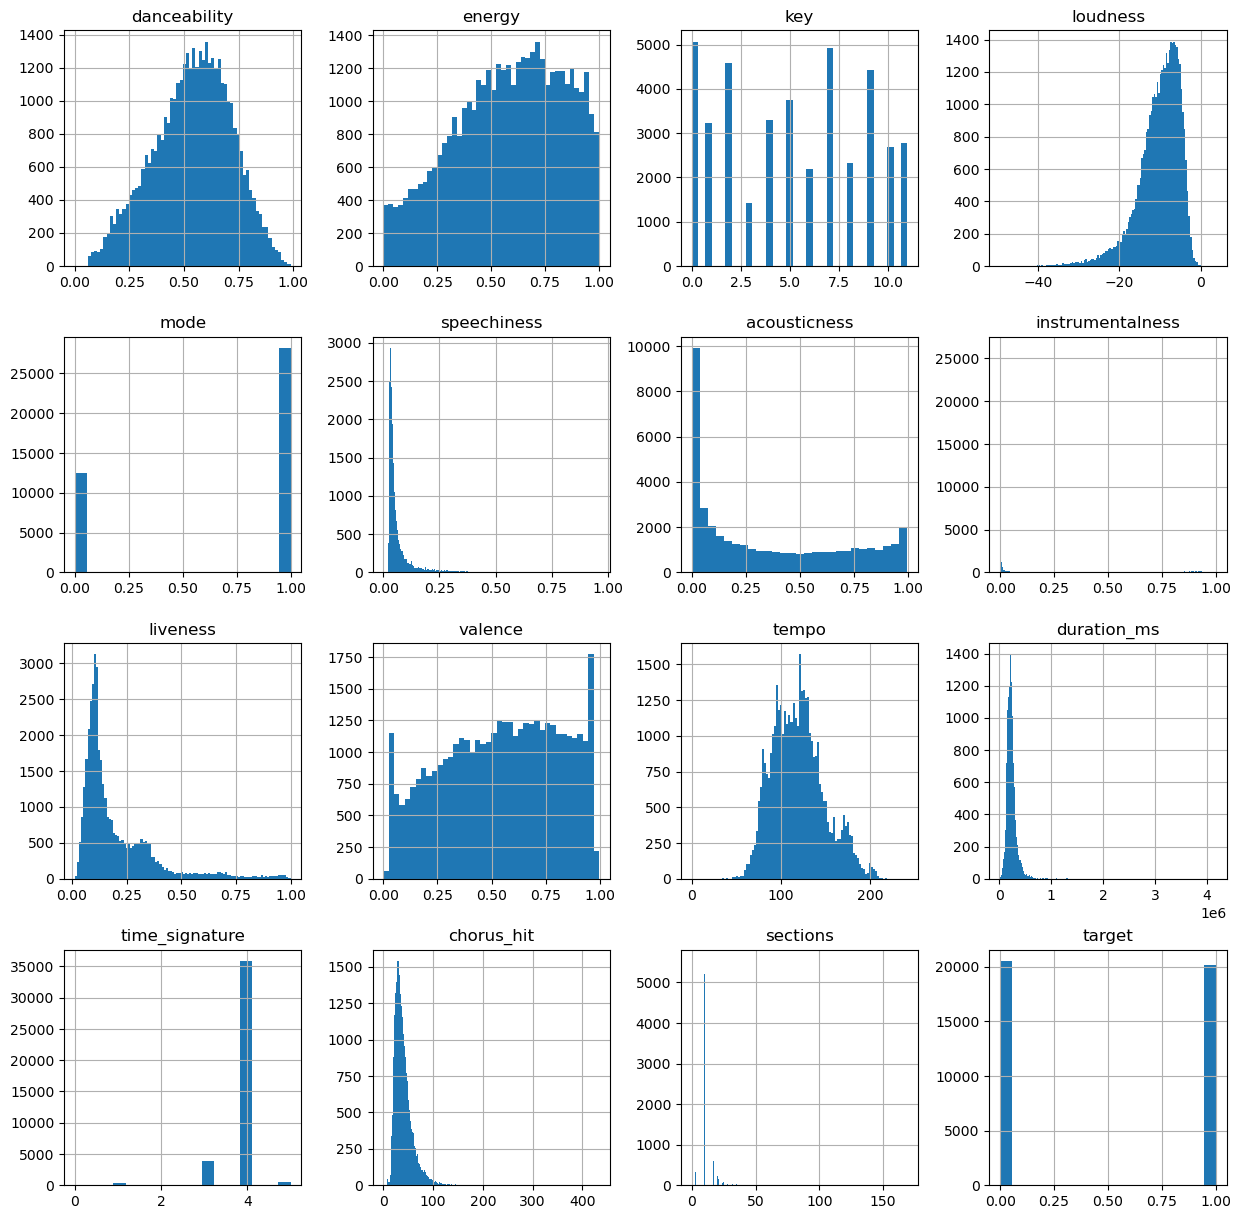

In [22]:
#the distributios of numeric variables are
df.hist(bins= "auto", figsize=(15,15))
# plt.savefig("./images/histograms")

Majority of the songs have danceability factor of around 0.5. The songs have valence greater than 0.5 outnumber the songs having valence less than 0.5. The 'hit' and 'unhit' songs are almost equal in number.  As predicted earler, loudness and liveness are having skewed distribution. Also according to the distribution of energy values, we can see that most songs have high energy values. 

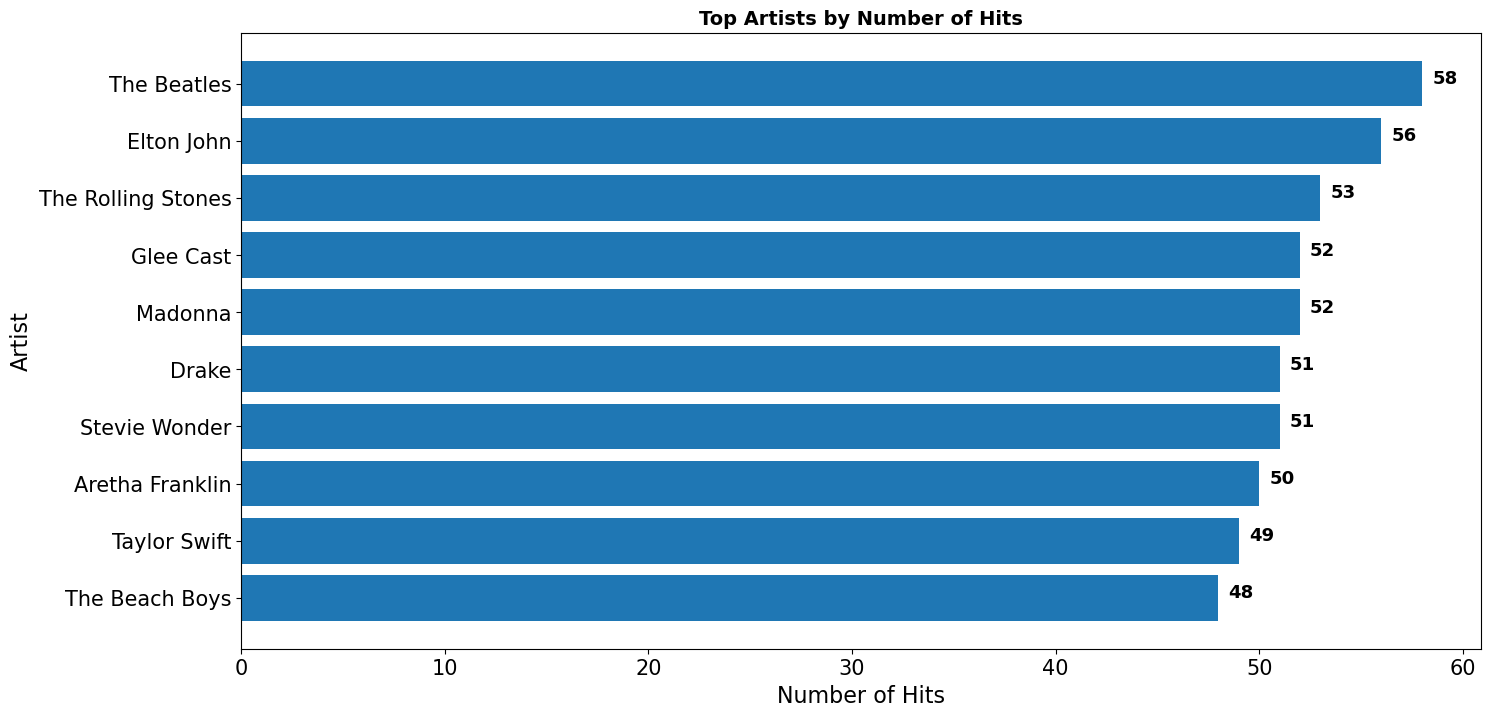

In [26]:
famous_artists = df[df.target==1].groupby("artist")['target'].sum().sort_values(ascending=False)[:10]
fig, ax = plt.subplots( figsize= (16,8))
ax.barh(y = famous_artists.index, width = famous_artists)
plt.title("Top Artists by Number of Hits", fontsize = 14, 
          fontweight = "bold")
plt.xlabel("Number of Hits", fontsize= 16)
plt.ylabel("Artist", fontsize = 16)
ax.tick_params(labelsize = 15)
ax.invert_yaxis()
for i, v in enumerate(famous_artists):
    ax.text(v + 0.5, i, str(v), color = "black",fontweight = "bold", fontsize = 13)


The Beatles top the list of "hit" songs

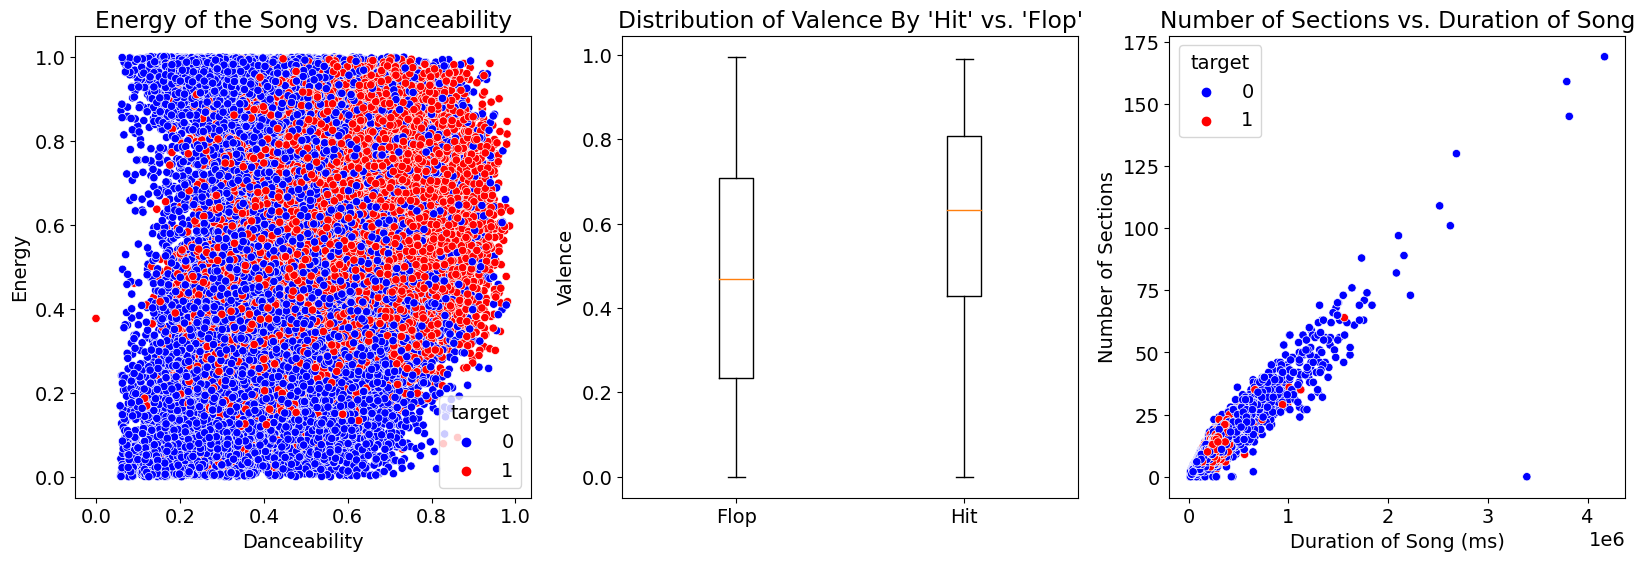

In [27]:
#valence distribution per song type 


# valence distribution per song type
target_dict = {"Flop": df.loc[df.target == 0, "valence"], 
               "Hit": df.loc[df.target == 1, "valence"]}

plt.rcParams["font.size"] = 14

fig, ax = plt.subplots(1, 3, figsize = (20,6))
# energy vs. danceability scatterplot
sns.scatterplot(x = "danceability", y = "energy", hue = "target", 
                palette = ["b", "r"], data = df, ax = ax[0])
ax[0].set_title("Energy of the Song vs. Danceability")
ax[0].set_xlabel("Danceability")
ax[0].set_ylabel("Energy")

# distribution of valence per hit/flop
ax[1].boxplot(target_dict.values(), labels = target_dict.keys());
ax[1].set_title("Distribution of Valence By 'Hit' vs. 'Flop'")
ax[1].set_ylabel("Valence")

sns.scatterplot(x = "duration_ms", y = "sections", hue = "target",
               palette = ["b", "r"], data = df, ax = ax[2])
ax[2].set_title("Number of Sections vs. Duration of Song")
ax[2].set_xlabel("Duration of Song (ms)")
ax[2].set_ylabel("Number of Sections");


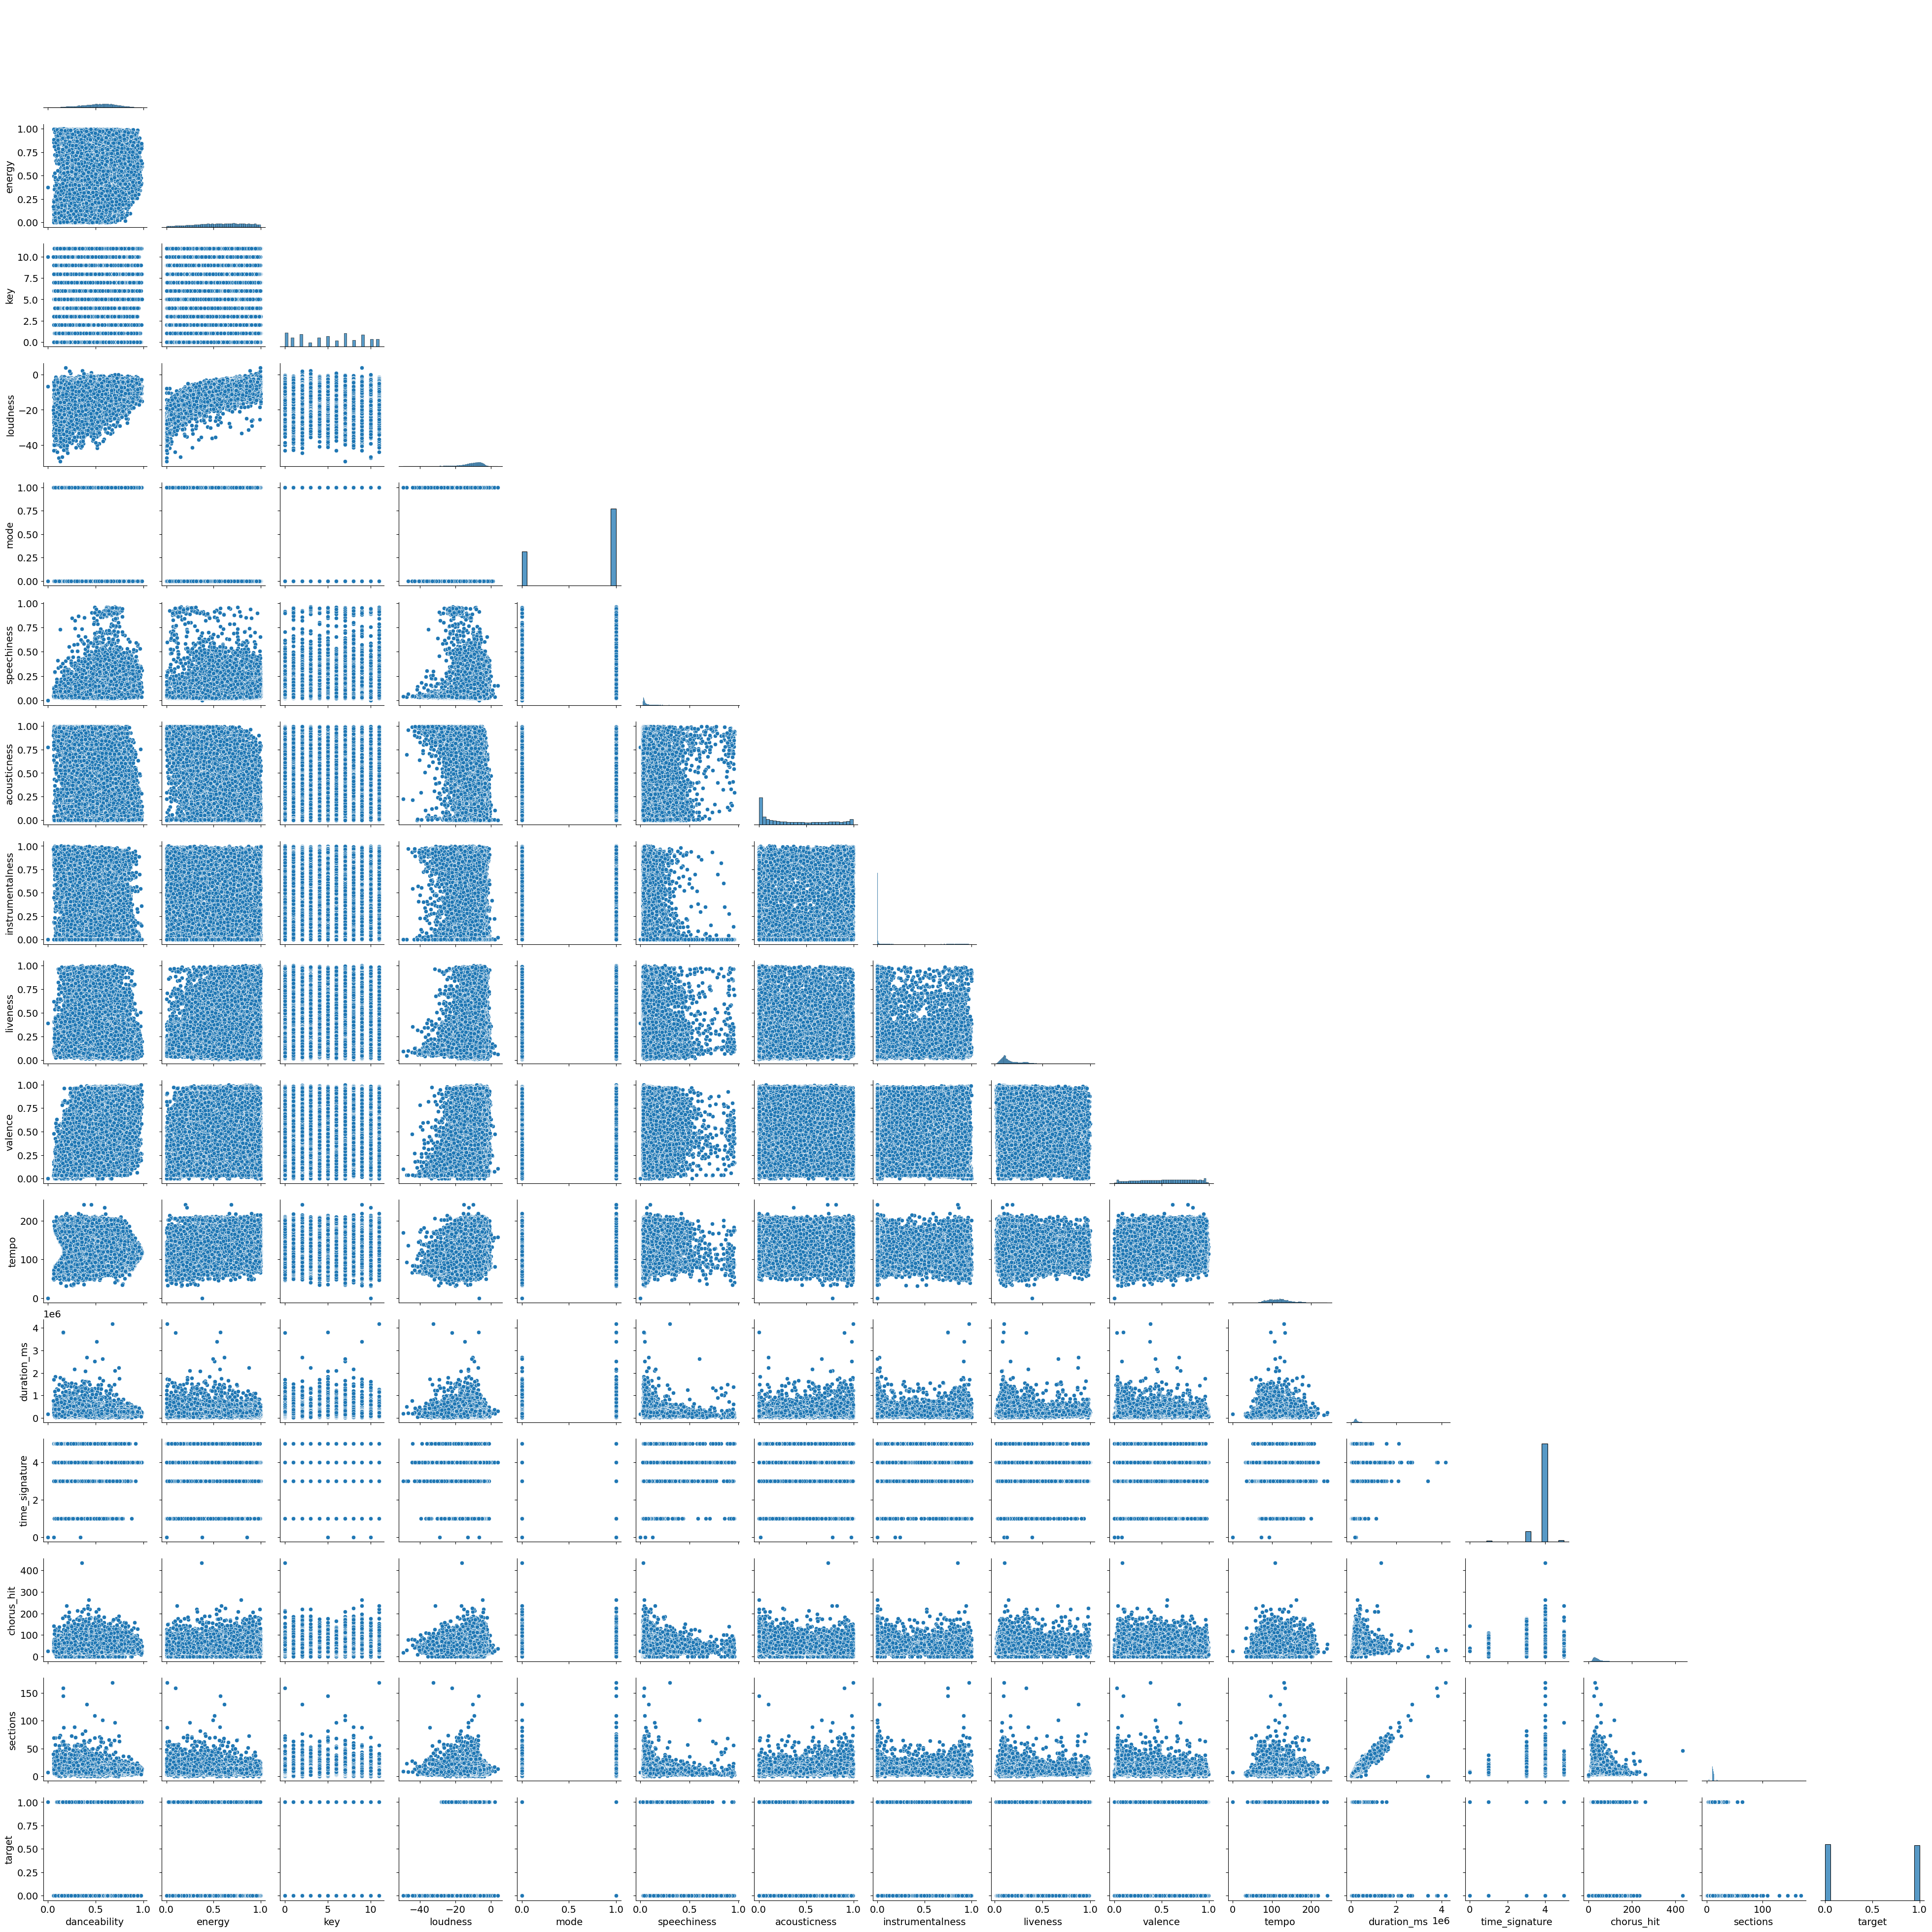

In [32]:
#lower triangle pairplot
sns.pairplot(df, corner=True)

In [33]:
df = df.drop(["track", "artist", "uri"], axis = 1)

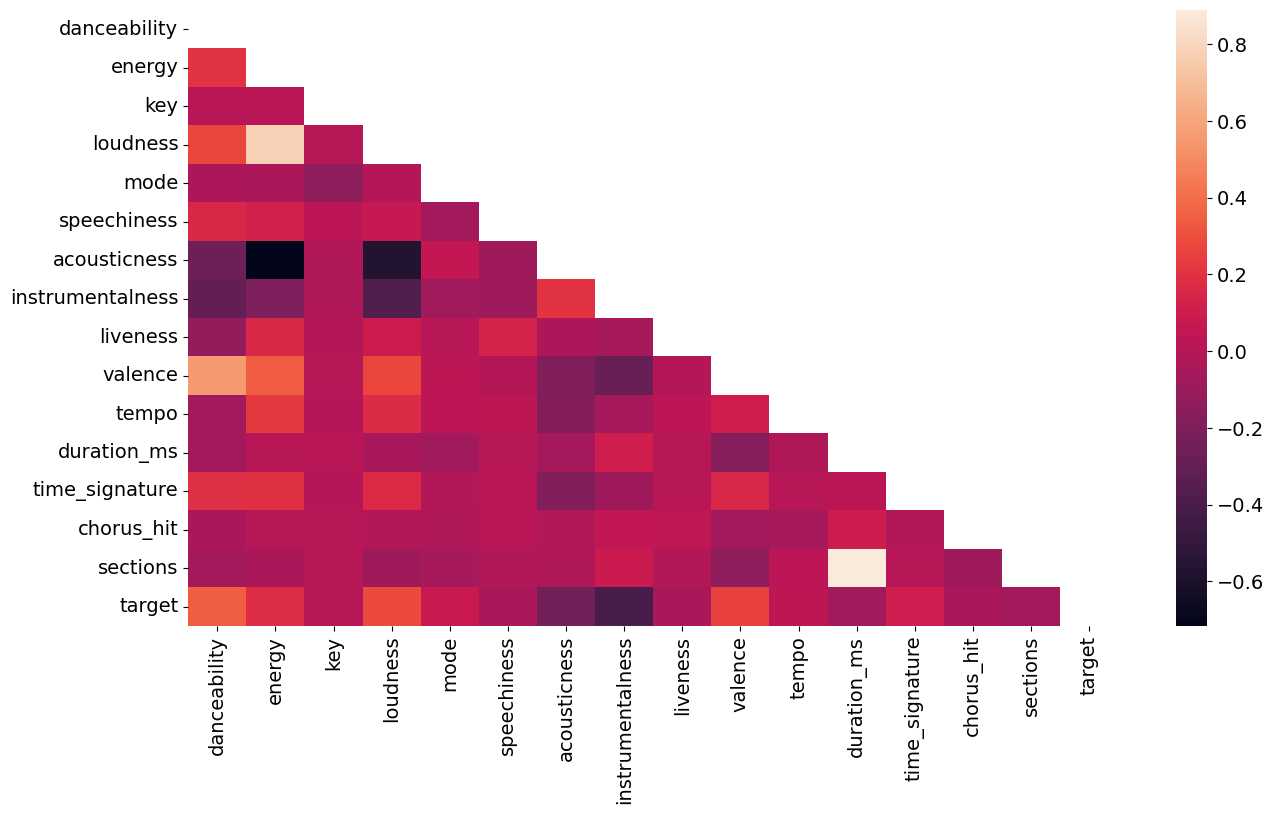

In [34]:
plt.figure(figsize = (15,8))
# correlation heatmap
sns.heatmap(df.corr(), mask = np.triu(np.ones_like(df.corr())));
# plt.savefig("./images/heatmap.png", dpi = 150, bbox_inches = "tight")

In [35]:
# correlation between two variables
df[["sections", "duration_ms", "loudness", "energy", "acousticness"]].corr()


sections  duration_ms  loudness    energy  acousticness
sections      1.000000     0.889476 -0.080645 -0.040583     -0.016200
duration_ms   0.889476     1.000000 -0.050404  0.011503     -0.069565
loudness     -0.080645    -0.050404  1.000000  0.772886     -0.566687
energy       -0.040583     0.011503  0.772886  1.000000     -0.715834
acousticness -0.016200    -0.069565 -0.566687 -0.715834      1.000000

In [36]:
# dropping variable with high correlation
df = df.drop("sections", axis = 1)

In [37]:
# save data frames for use in separate notebook!
df.to_csv("data/cleaned-data.csv", index = False)